<a href="https://colab.research.google.com/github/MohammadsaeedHaghi/Arbitrage-Repair/blob/main/Plot_comparison_between_Approximation_and_Actual_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate probabilities distribution for a cycle with 2n nodes

In [ ]:

def calculate_probabilities(n):
    total_nodes = 2 * n
    probabilities = []

    for i in range(0, n + 1):
        if i == 0 or i == n:
            probability = 1 / (2 * n)
        else:
            probability = 1 / n
        probabilities.append(probability)

    return probabilities

n = 5  # Example: n = 5, total_nodes = 10
probabilities = calculate_probabilities(n)
print(probabilities)

In [ ]:
!apt-get install python3.9

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib mailcap mime-support python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib mailcap mime-support python3.9 python3.9-minimal
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 5,279 kB of archives.
After this operation, 19.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.18-1+jammy1 [835 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minimal am

In [ ]:
!python

Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 

KeyboardInterrupt
>>> 
^C


# Calculate the Approximation with given distribution and lambda and p

In [ ]:
def value(prob,lamda,p) :
  ans = -p*lamda
  inlog = 0
  for i in range (0,len(probabilities),1):
    inlog = inlog + prob[i] * np.exp(-1 * i * lamda)

  ans = ans - np.log(inlog)
  return ans

# Plot Approximatoin answer and p

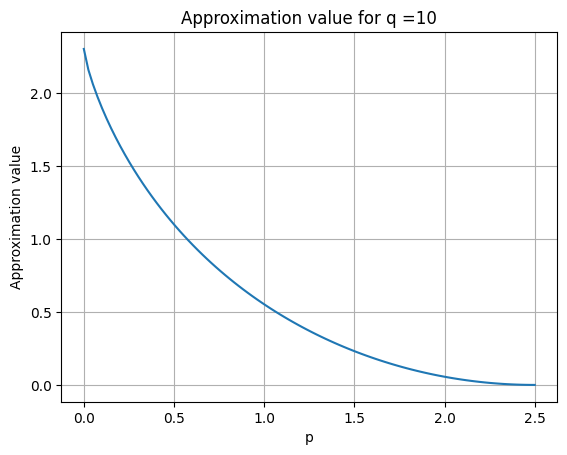

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 5 # Replace with your desired value of n ( half of the cycle lenght)
q = 2*n
probabilities = calculate_probabilities(n)
# Generate x values between 0 and 1
p = np.linspace(0, n/2, 100)
lamda = ((n/2)**(1/(2*n)) - p**(1/(2*n))) * 9.1297
#lamda = ((n/2)**(1/(4*n)) - p**(1/(4*n))) * 22

# Calculate the function values
g = value(probabilities,lamda,p)
y = g


plt2xdata = p
plt2ydata = y


# Plot the function
plt.plot(plt2xdata, plt2ydata)
plt.xlabel('p')
plt.ylabel('Approximation value')
plt.title('Approximation value for q =' + str(2*n) )
plt.grid(True)
plt.show()

# Plotting the objective function

<ipython-input-7-4bbaebc772cd>:19: RuntimeWarning: divide by zero encountered in log
  s = s + x[i] * np.log( x[i] * m / 2)
<ipython-input-7-4bbaebc772cd>:19: RuntimeWarning: invalid value encountered in double_scalars
  s = s + x[i] * np.log( x[i] * m / 2)
<ipython-input-7-4bbaebc772cd>:22: RuntimeWarning: divide by zero encountered in log
  s = s + x[l-1] * np.log(x[l - 1] * m)
<ipython-input-7-4bbaebc772cd>:22: RuntimeWarning: invalid value encountered in double_scalars
  s = s + x[l-1] * np.log(x[l - 1] * m)
<ipython-input-7-4bbaebc772cd>:17: RuntimeWarning: divide by zero encountered in log
  s = s + x[0] * np.log(x[0] * m)
<ipython-input-7-4bbaebc772cd>:17: RuntimeWarning: invalid value encountered in double_scalars
  s = s + x[0] * np.log(x[0] * m)


1.4313116644859216


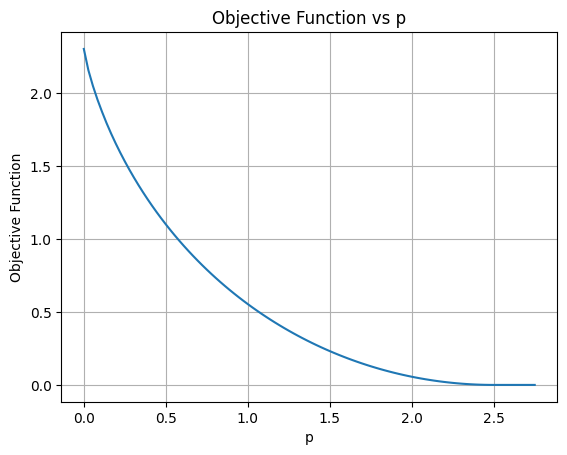

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


n = 10 #Cycle lenght
m = n
diam = 5

D = 1.1 * n / 4 #D bar calculation



def objective(x):
    l = x.size
    s = 0
    s = s + x[0] * np.log(x[0] * m)
    for i in range (1, l - 1, 1):
      s = s + x[i] * np.log( x[i] * m / 2)


    s = s + x[l-1] * np.log(x[l - 1] * m)
    return s



def expectedvalue(x):
  s = 0
  for i in range(0, x.size ,1):
    s = s + i * x[i]
  return s



def constraint(x, p):
    return p - expectedvalue(x)



def optimize_objective(p, diam):
    x0 = [0.5] * (diam + 1)
    bounds = [(0, 1)] * (diam + 1)
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1},
                   {'type': 'ineq', 'fun': lambda x: constraint(x,p)}]
    result = minimize(objective, x0, bounds=bounds, constraints=constraints)
    return result.x


# Plotting the objective function
p_values = np.linspace(0, D, 100)
objective_values = [objective(optimize_objective(p, diam)) for p in p_values]

print(objective(optimize_objective(0.3, diam)))

plt4xdata = p_values
plt4ydata = objective_values

plt_Cn = plt.plot(p_values, objective_values)
plt.xlabel('p')
plt.ylabel('Objective Function')
plt.title('Objective Function vs p')
plt.grid(True)
plt.show()

# final Plot

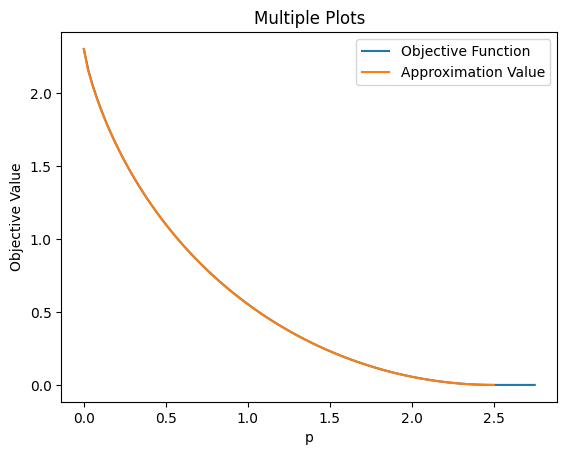

In [ ]:
import matplotlib.pyplot as plt

# Create three plots

plt1 = plt.plot(plt4xdata,   plt4ydata,   label='Objective Function')
plt2 = plt.plot(plt2xdata,   plt2ydata,   label='Approximation Value')

# Set labels and title
plt.xlabel('p')
plt.ylabel('Objective Value')
plt.title('Multiple Plots')

# Add legend
plt.legend()

# Show the plot
plt.show()

# **December 12, 2023**


In [ ]:
import numpy as np
import math

Ncodelenght = 30
q = 100 #size of the graph (vertices)
diam = 50  #dimeter (half q) + 1
D =  q / 4 #D bar calculation
log_coefficient = np.emath.logn(q, 2)
Ncodelenght_coefficient =  ( Ncodelenght + 1 ) ** (diam  + 1)
alphabound_coefficeint = 1 + ( 16* 33 * np.power( Ncodelenght , 0.5) / (q**2) )


#new opjective
def CalculatealphaN (p) :
  ans =  alphabound_coefficeint * Ncodelenght_coefficient * np.power ( q , Ncodelenght * ( 1 - objective(optimize_objective(p, diam) ) * log_coefficient ) )
  return ans

# Plotting the objective function
p_values = np.linspace(0, D, 100)
objective_values = [ CalculatealphaN(p)**( 1 / (p*Ncodelenght) ) - 1  for p in p_values]

print (min(objective_values))

for i in range ( i = 0 , i<= 99 , i++):
  if (objective_values[i] - min(objective_values)) <= 1 :
    print (p_values[i])


plt_Cn = plt.plot(p_values, objective_values)
plt.xlabel('p')
plt.ylabel('Objective Function')
plt.title('Objective Function vs p for q =' + str(q))
plt.grid(True)
plt.show()






SyntaxError: ignored